In [1]:
import os
import sys

import torch
from torchvision import transforms
from torch.utils.data import DataLoader

sys.path.append("../")
from data_preparation import CustomDataset
from networks import UNet
from utils import Params, show_tensor_images, load_checkpoint

In [2]:
data_dir = "../data/val"
model_dir = "../models/checkpoints"
checkpoint = "231119195749"

In [3]:
transform = transforms.Compose([transforms.ToTensor()])
dataset = CustomDataset(data_dir, transform)
dataloader = DataLoader(
    dataset, batch_size=4, shuffle=False, drop_last=True
)

In [4]:
config_path = os.path.join(model_dir, checkpoint, "hyper_params/params.json")
config = Params(config_path)

In [5]:
gen = UNet(config.INPUT_DIM, config.REAL_DIM)
gen.train()
state_path = os.path.join(model_dir, checkpoint, "state/gen_last.pth")
load_checkpoint(state_path, gen)

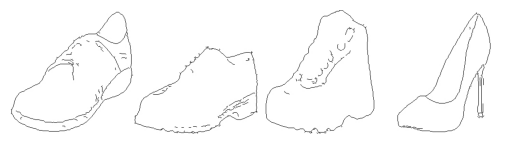

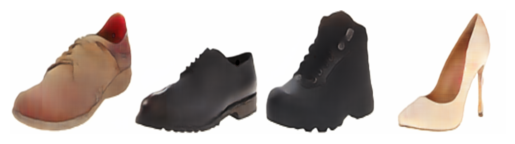

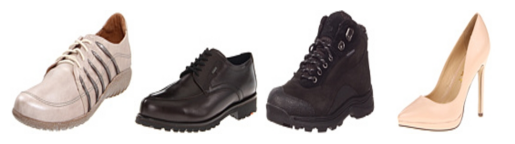

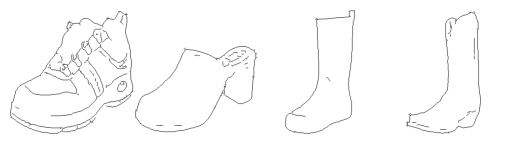

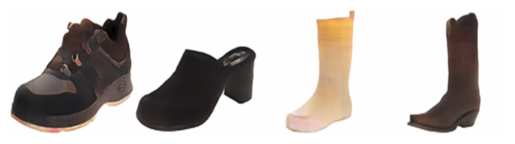

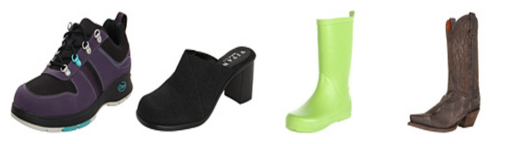

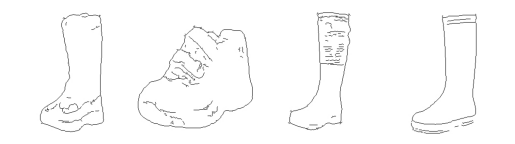

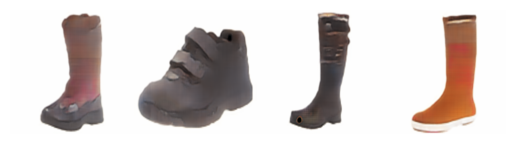

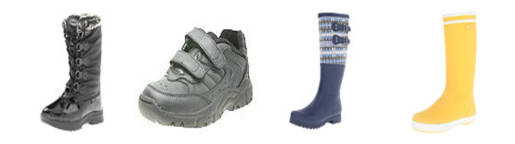

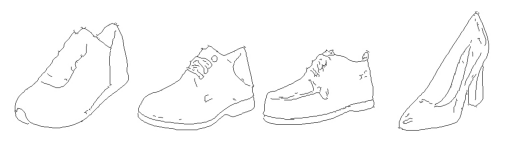

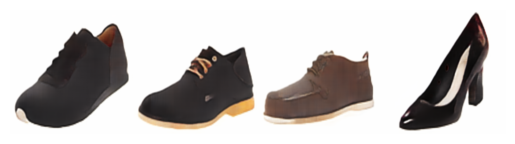

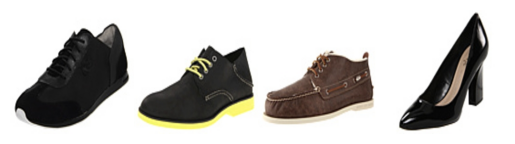

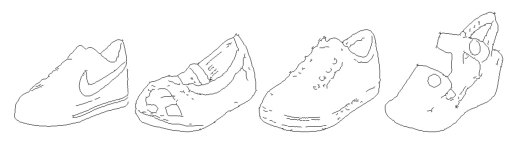

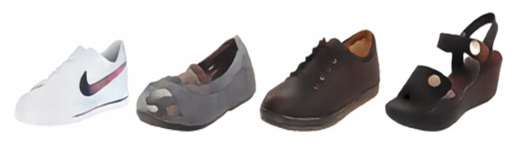

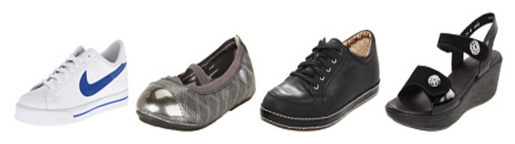

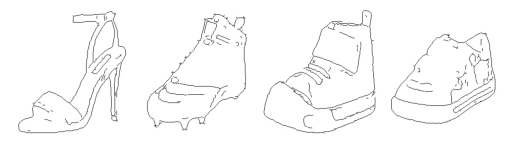

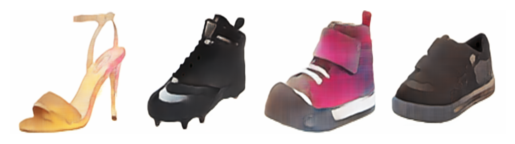

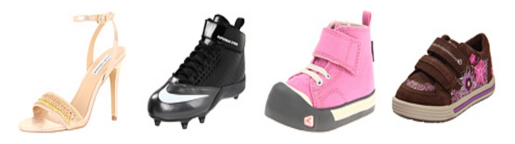

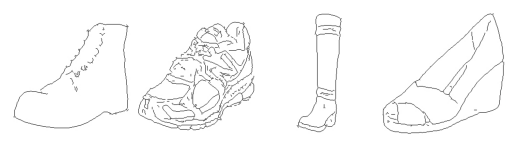

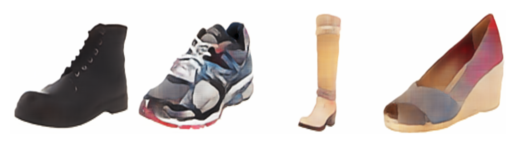

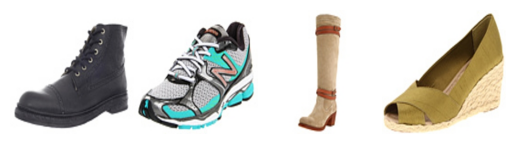

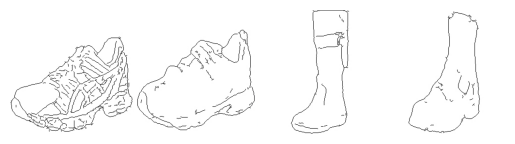

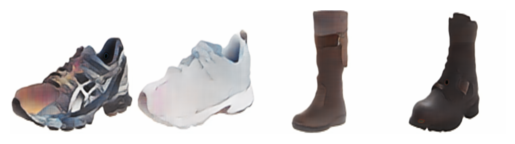

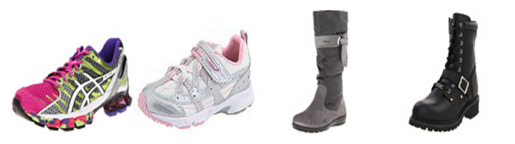

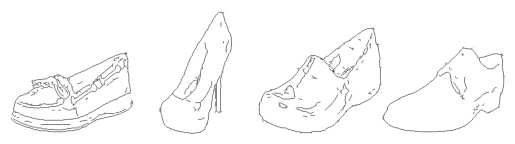

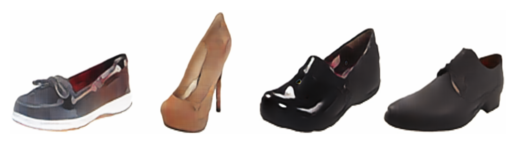

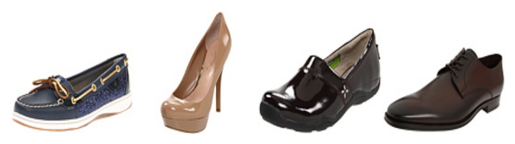

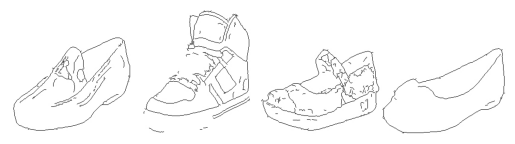

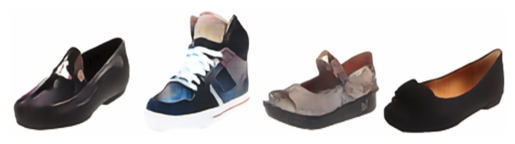

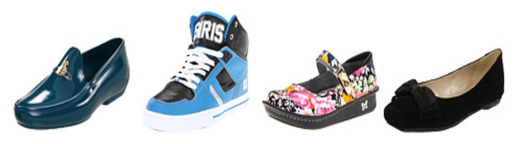

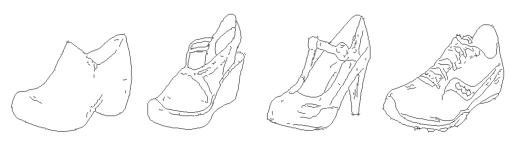

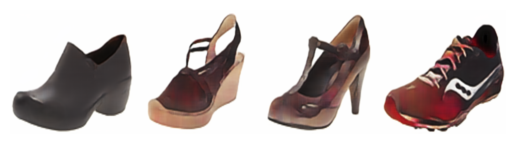

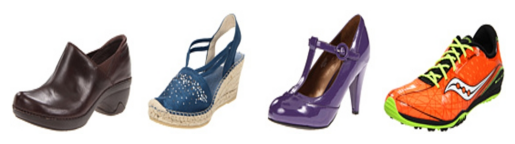

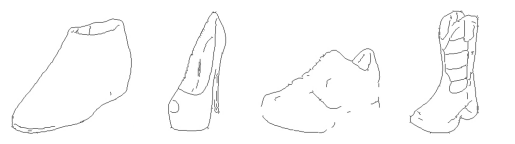

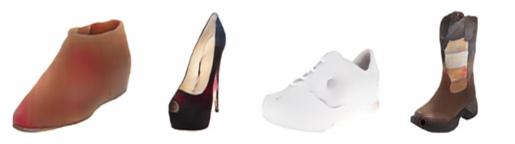

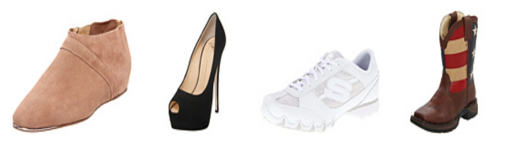

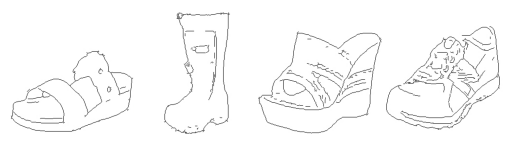

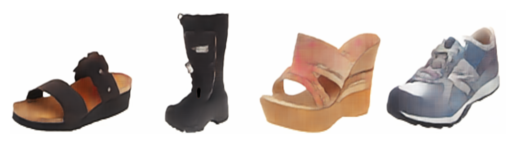

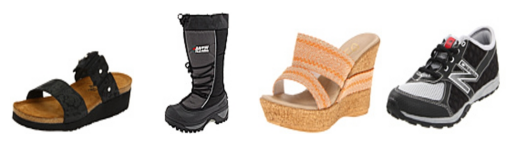

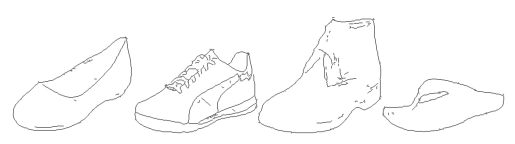

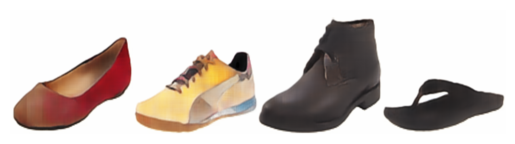

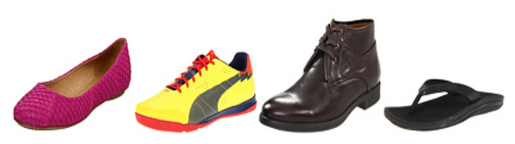

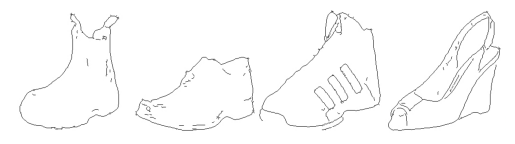

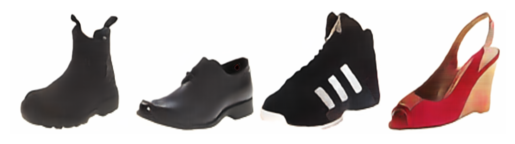

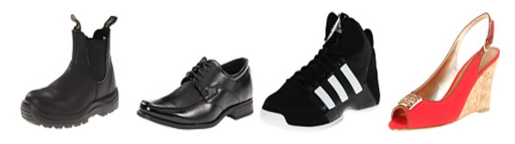

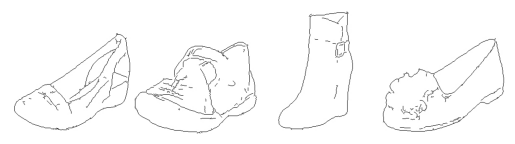

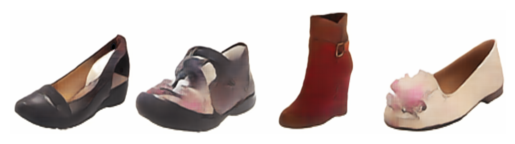

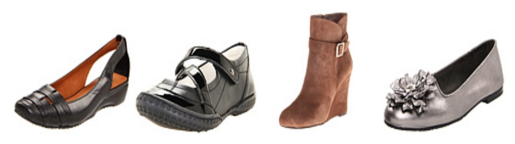

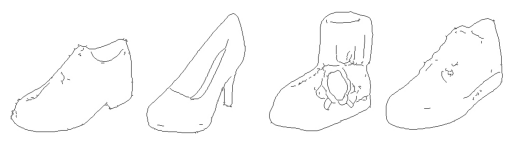

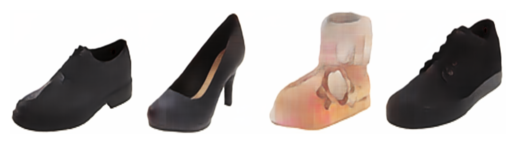

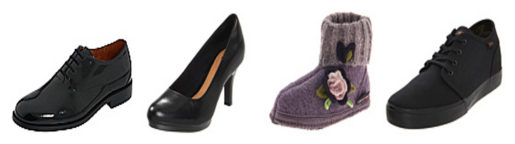

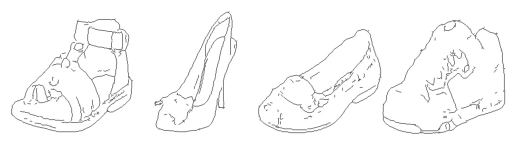

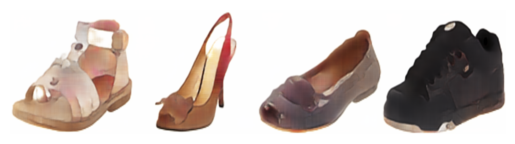

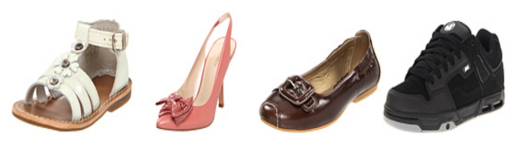

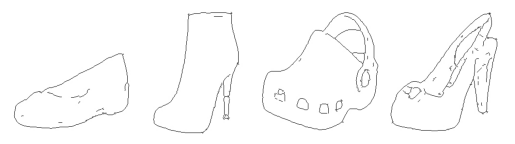

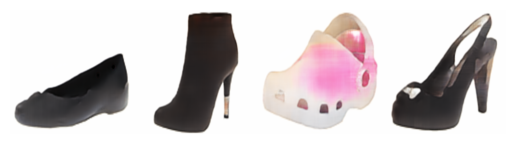

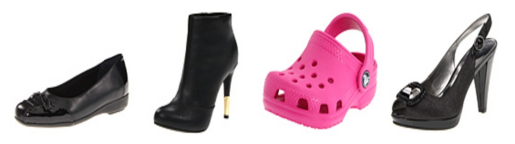

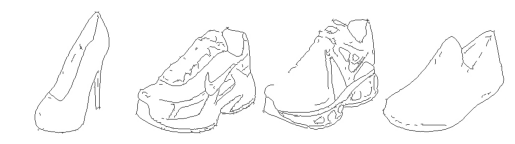

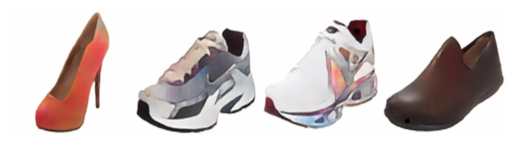

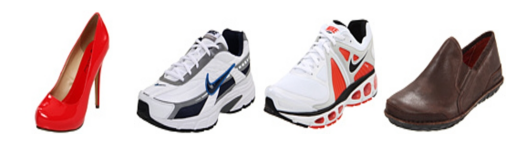

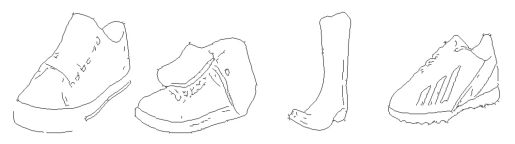

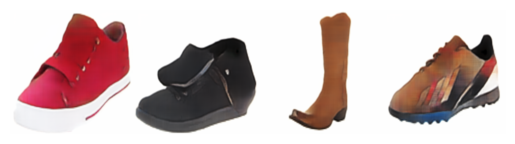

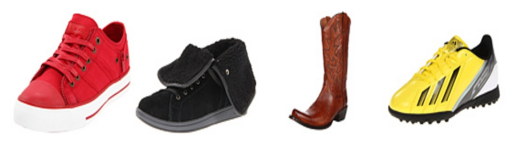

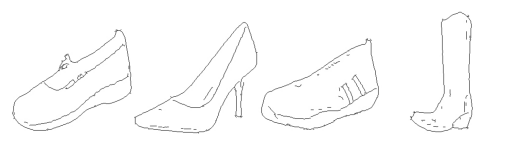

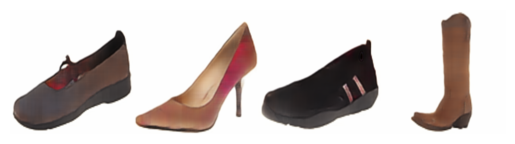

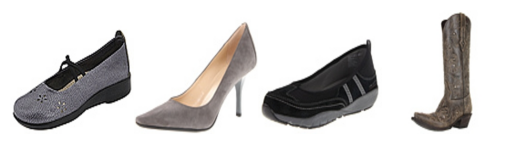

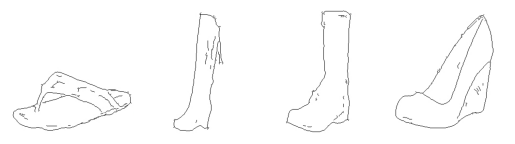

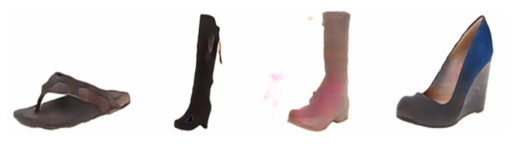

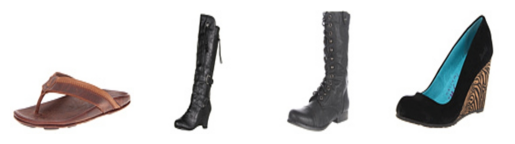

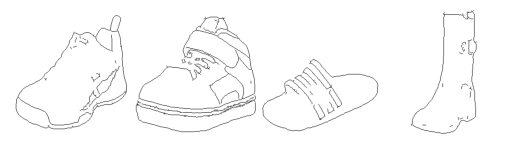

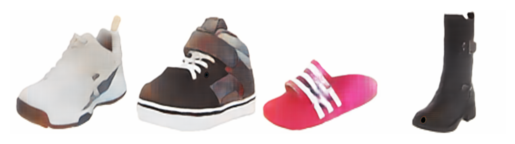

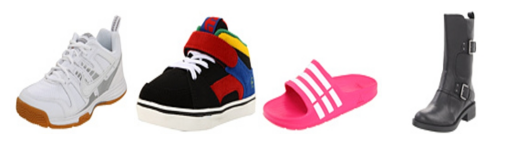

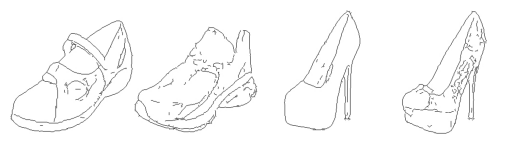

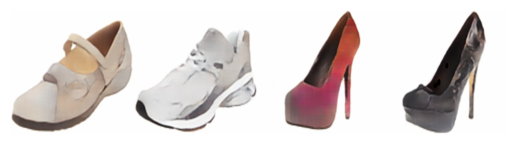

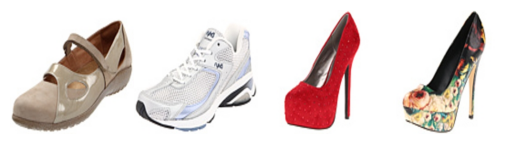

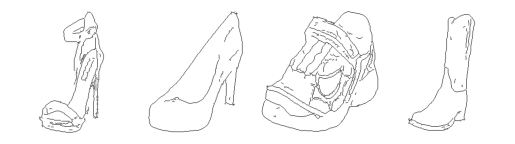

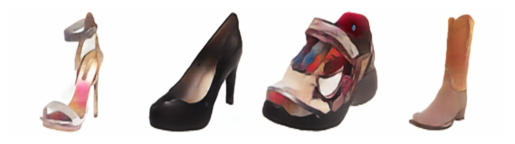

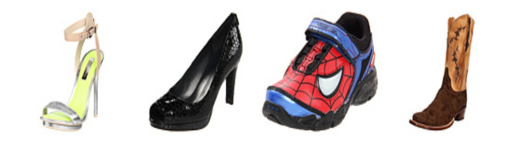

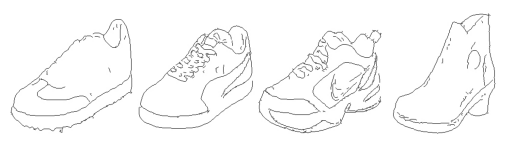

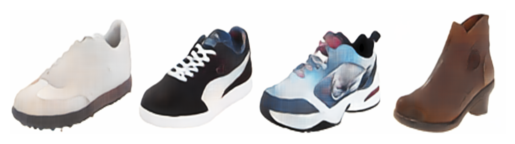

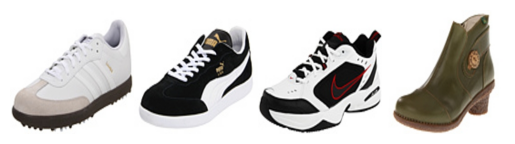

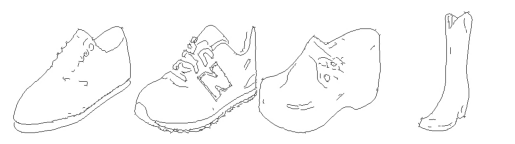

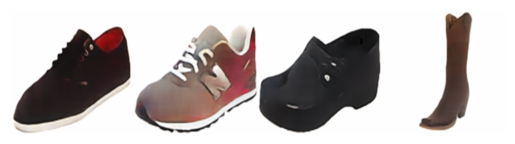

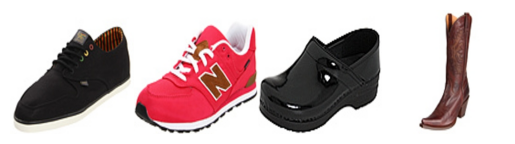

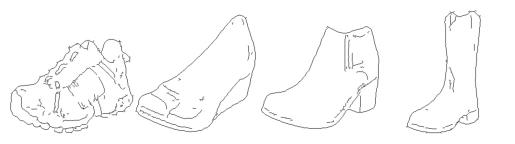

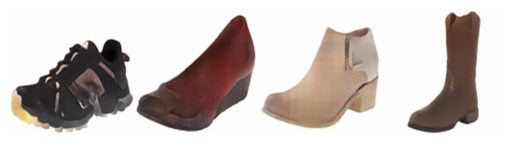

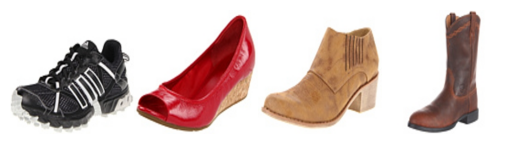

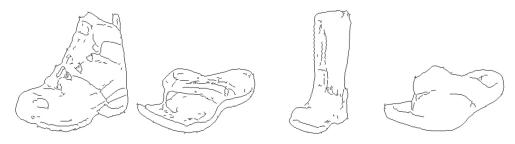

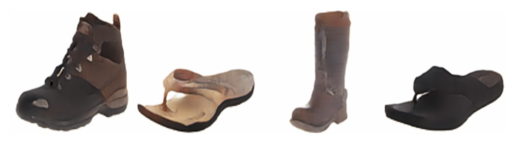

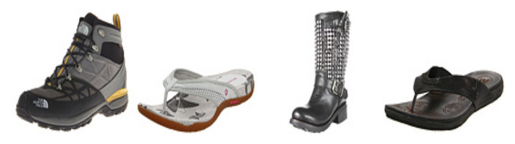

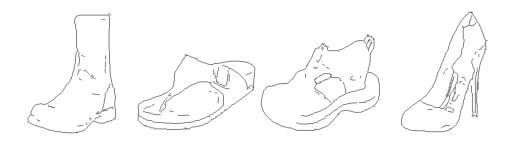

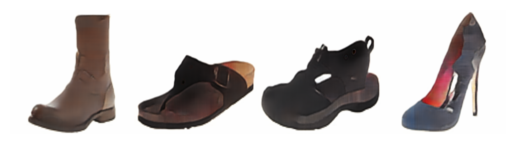

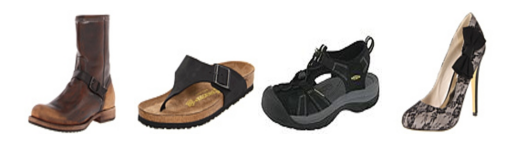

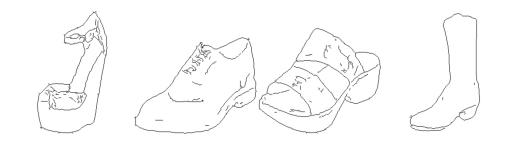

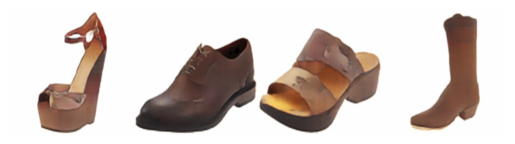

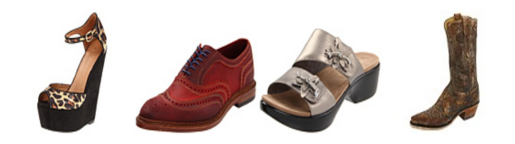

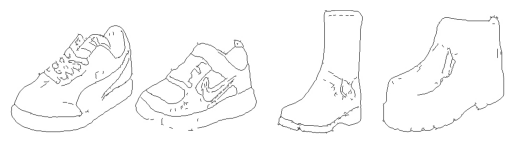

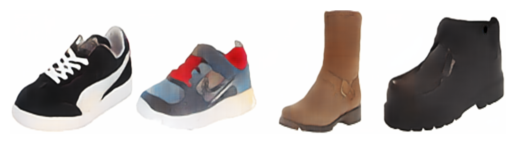

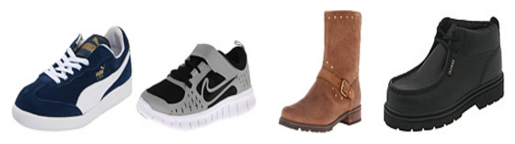

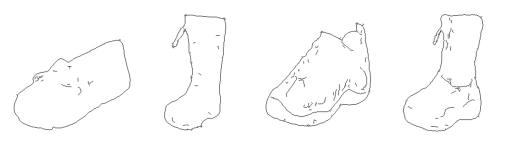

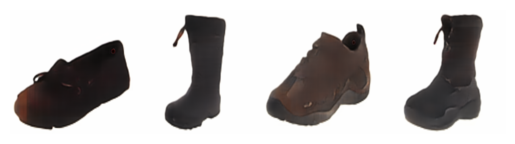

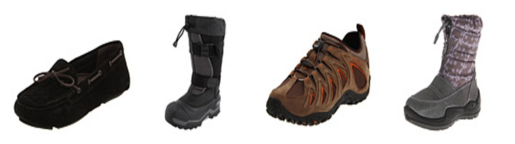

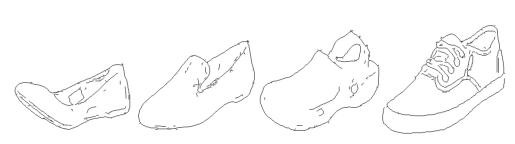

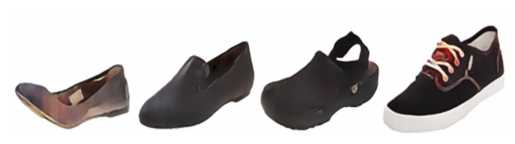

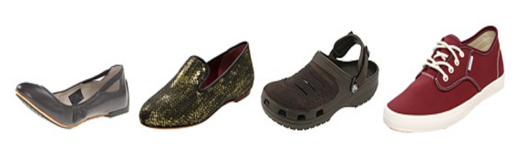

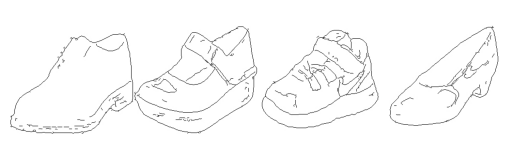

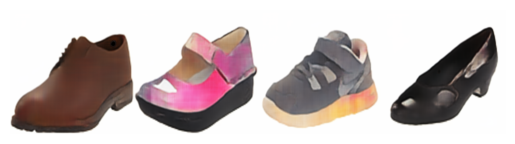

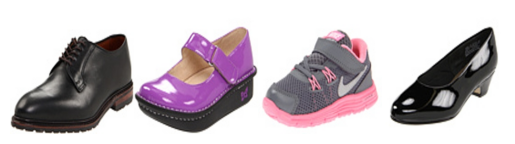

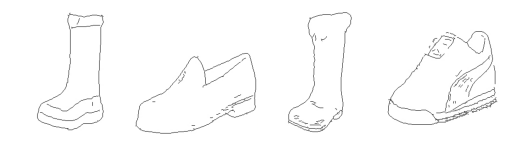

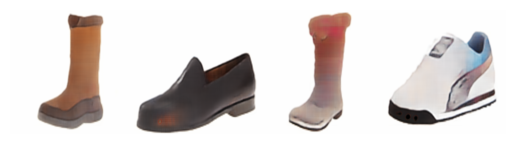

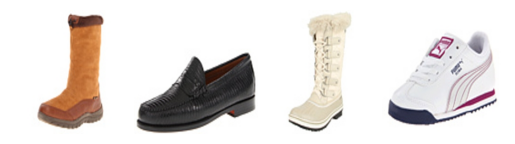

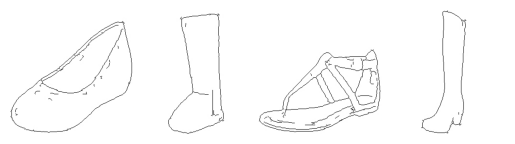

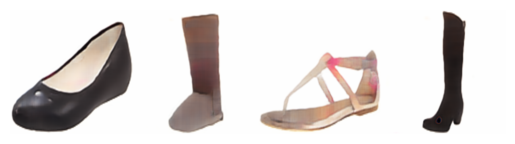

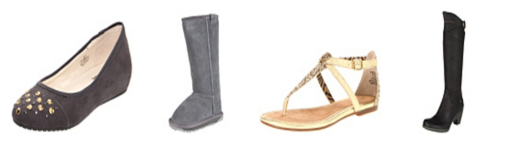

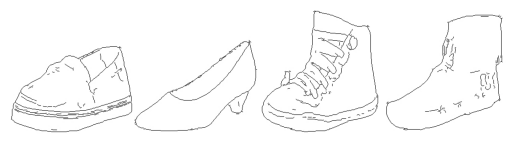

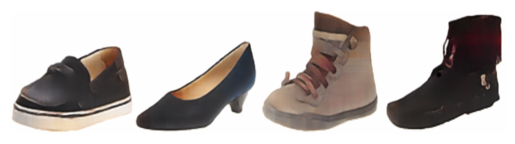

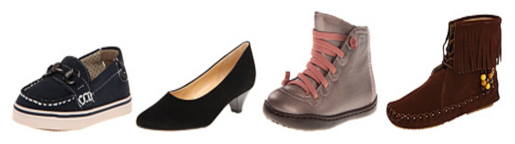

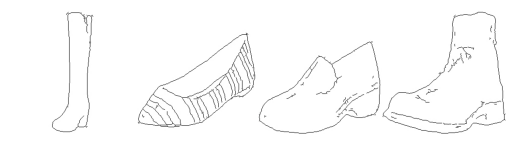

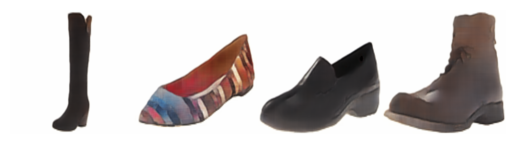

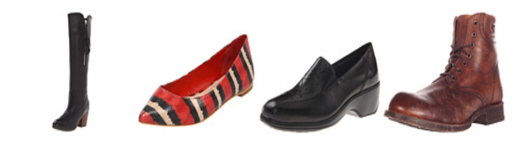

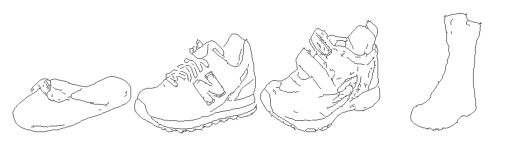

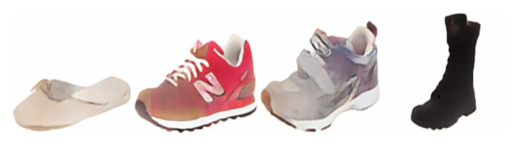

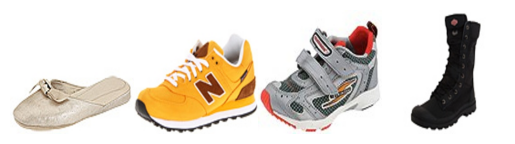

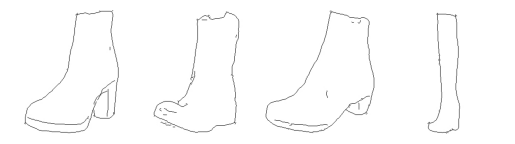

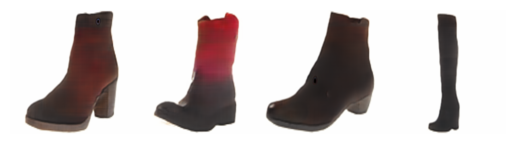

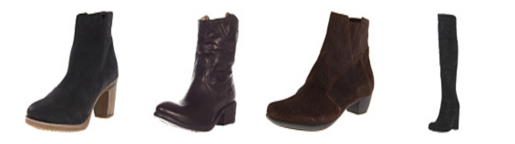

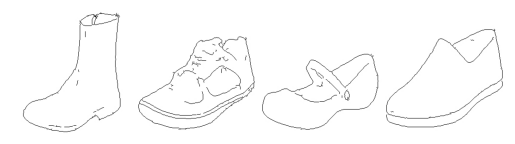

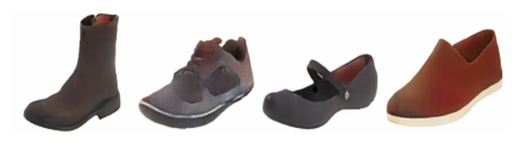

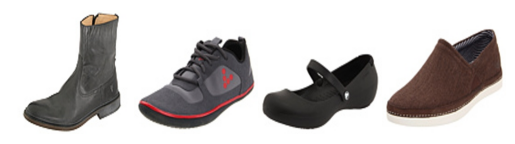

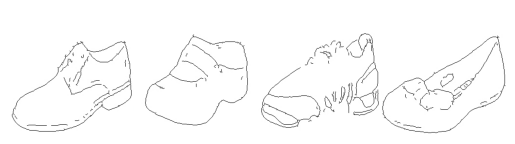

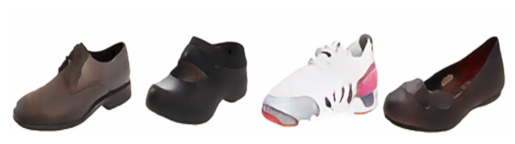

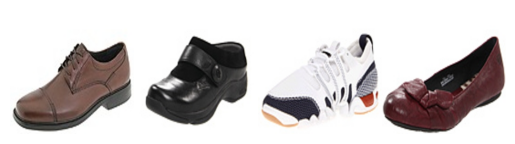

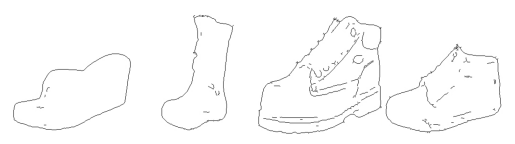

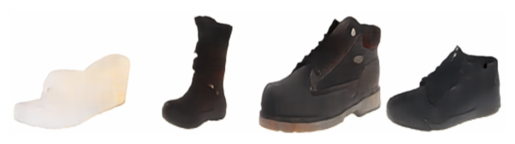

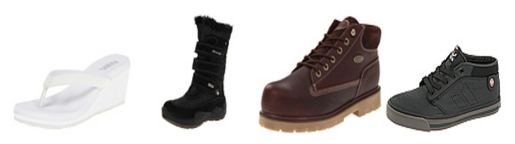

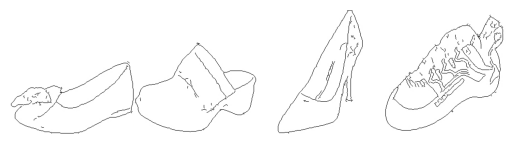

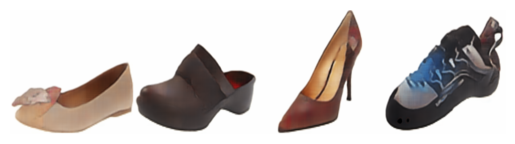

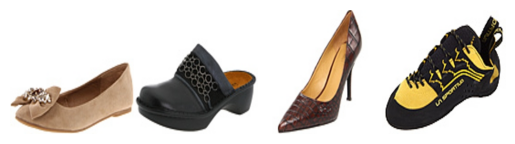

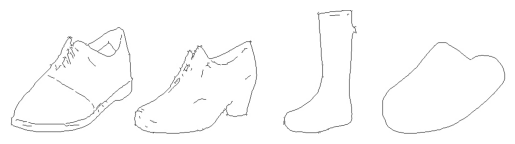

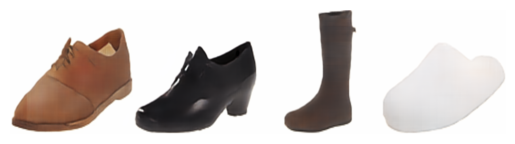

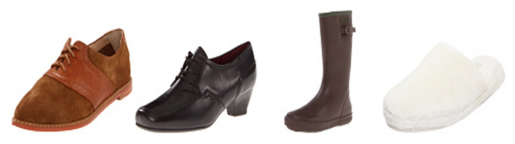

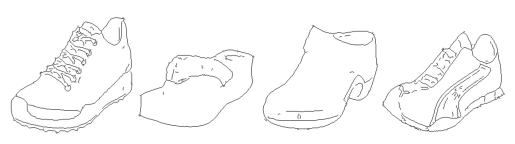

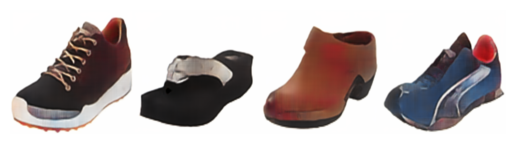

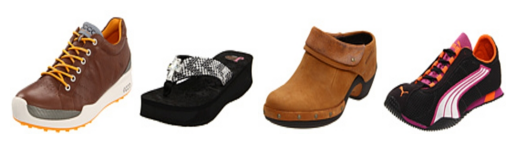

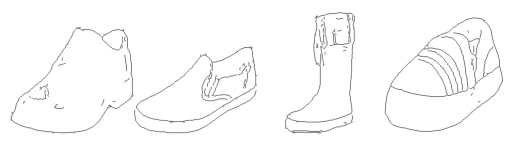

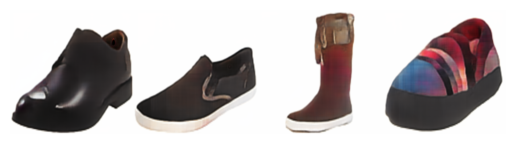

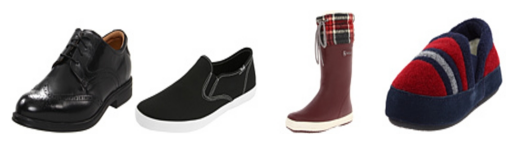

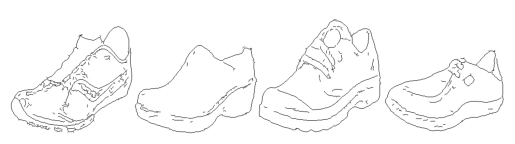

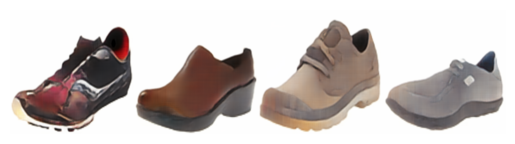

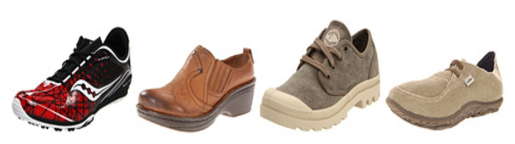

In [6]:
for data_batch in dataloader:
    condition_batch, real_batch = data_batch
    with torch.no_grad():
        fake_batch = gen(condition_batch)
    show_tensor_images(condition_batch, num=4)
    show_tensor_images(fake_batch, num=4)
    show_tensor_images(real_batch, num=4)
    